**MAESTRÍA EN INTELIGENCIA ARTIFICIAL APLICADA**

**Curso: TC4029 - Ciencia y analítica de datos**

Tecnológico de Monterrey

Prof Grettel Barceló Alonso

**Semana 4**
Exploración de datos

---

*   NOMBRE: Fernando Abel Leal Villacicencio
*   MATRÍCULA: A01796859

In [147]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [148]:
df = pd.read_csv("credit_risk_dataset.csv")
df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


# **Parte 1**. Análisis descriptivo (univariante)

1. Utiliza el método `info()` del dataframe, para obtener el resumen de los tipos de datos. ¿Cuántas columnas son numéricas y cuántas cualitativas?

In [149]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [150]:
df['loan_status'] = df['loan_status'].astype('object')

In [151]:
num_cols = df.select_dtypes(['float64', 'int64']).shape[1]
cual_cols = df.select_dtypes('object').shape[1]

print(f"Número de columnas numéricas: {num_cols}")
print(f"Número de columnas cualitativas: {cual_cols}")

Número de columnas numéricas: 7
Número de columnas cualitativas: 5


Dado que `loan_status` es realmente una variable categórica donde 0 es no incumplimiento y 1 es incumplimiento hay que cambiar el tipo de dato para dicha columna por lo que tenemos realmente 7 columnas numérica y 5 cualitativas.

 2. Determina el porcentaje de valores faltantes por columna.

In [152]:
df.isna().mean()*100

person_age                    0.000000
person_income                 0.000000
person_home_ownership         0.000000
person_emp_length             2.747000
loan_intent                   0.000000
loan_grade                    0.000000
loan_amnt                     0.000000
loan_int_rate                 9.563856
loan_status                   0.000000
loan_percent_income           0.000000
cb_person_default_on_file     0.000000
cb_person_cred_hist_length    0.000000
dtype: float64

# Análisis de variables numéricas

3. Obtén las siguientes estadísticas descriptivas para todas las variables numéricas:
*   Tendencia central (media, mediana)
*   Dispersión o variabilidad (min, max, desviación estándar, cuartiles)
*   Forma (asimetría y curtosis)
*   Clasifica las variables `person_age` y `loan_in_rate` según los valores observados de asimetría y curtosis

**NOTA**. Recuerda que muchas de estas estadísticas, puedes obtenerlas utilizando la función `describe()` y que la mediana está representada en el 2do cuartil (50%)

In [153]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
person_age,32581.0,27.734600,6.348078,20.00,23.00,26.00,30.00,144.00
person_income,32581.0,66074.848470,61983.119168,4000.00,38500.00,55000.00,79200.00,6000000.00
person_emp_length,31686.0,4.789686,4.142630,0.00,2.00,4.00,7.00,123.00
loan_amnt,32581.0,9589.371106,6322.086646,500.00,5000.00,8000.00,12200.00,35000.00
loan_int_rate,29465.0,11.011695,3.240459,5.42,7.90,10.99,13.47,23.22
loan_percent_income,32581.0,0.170203,0.106782,0.00,0.09,0.15,0.23,0.83
cb_person_cred_hist_length,32581.0,5.804211,4.055001,2.00,3.00,4.00,8.00,30.00


In [154]:
Forma = df.select_dtypes(['float64', 'int64'])
Forma.skew().sort_values(ascending=False)

person_income                 32.865349
person_emp_length              2.614455
person_age                     2.581393
cb_person_cred_hist_length     1.661790
loan_amnt                      1.192477
loan_percent_income            1.064669
loan_int_rate                  0.208550
dtype: float64

In [155]:
Forma.kurt().sort_values(ascending=False)

person_income                 2693.272776
person_emp_length               43.722338
person_age                      18.560825
cb_person_cred_hist_length       3.716194
loan_amnt                        1.423565
loan_percent_income              1.223687
loan_int_rate                   -0.671609
dtype: float64

1. `person_age`: La asimetría muestra un valor positivo, lo que indica que la distribución de los valores atípicos tiende a ser mayor que la mayoría de los datos, extendiendo la distribución hacia la derecha. Además, la curtosis de esta variable también es positiva, por lo que se clasifica como `leptocúrtica`.

2. `loan_in_rate`: La variable se puede clasificar con asimetría positiva, ya que su valor es mayor 0, lo que indica que los valores atípicos extienden la distribución hacia la derecha. Sin embargo, la curtosis es menor a 0, por lo que la distribución se clasifica como `platicúrtica`.

4. Utiliza histogramas para determinar la distribución de los valores representados en cada variable.
*   ¿Se corresponde con lo obtenido en el cálculo de asimetría? Como verás, los datos reales son más complejos que la teoría. Por esta razón, recuerda siempre acompañar el análisis de la asimetría con algún gráfico como un histograma.

**NOTA**. Para esto también puedes ocupar los gráficos `kde` ([kernel density estimation](https://www.cienciadedatos.net/documentos/pystats02-kernel-density-estimation-kde-python.html)) que crean una curva continua y suave expandiendo la idea del histograma.

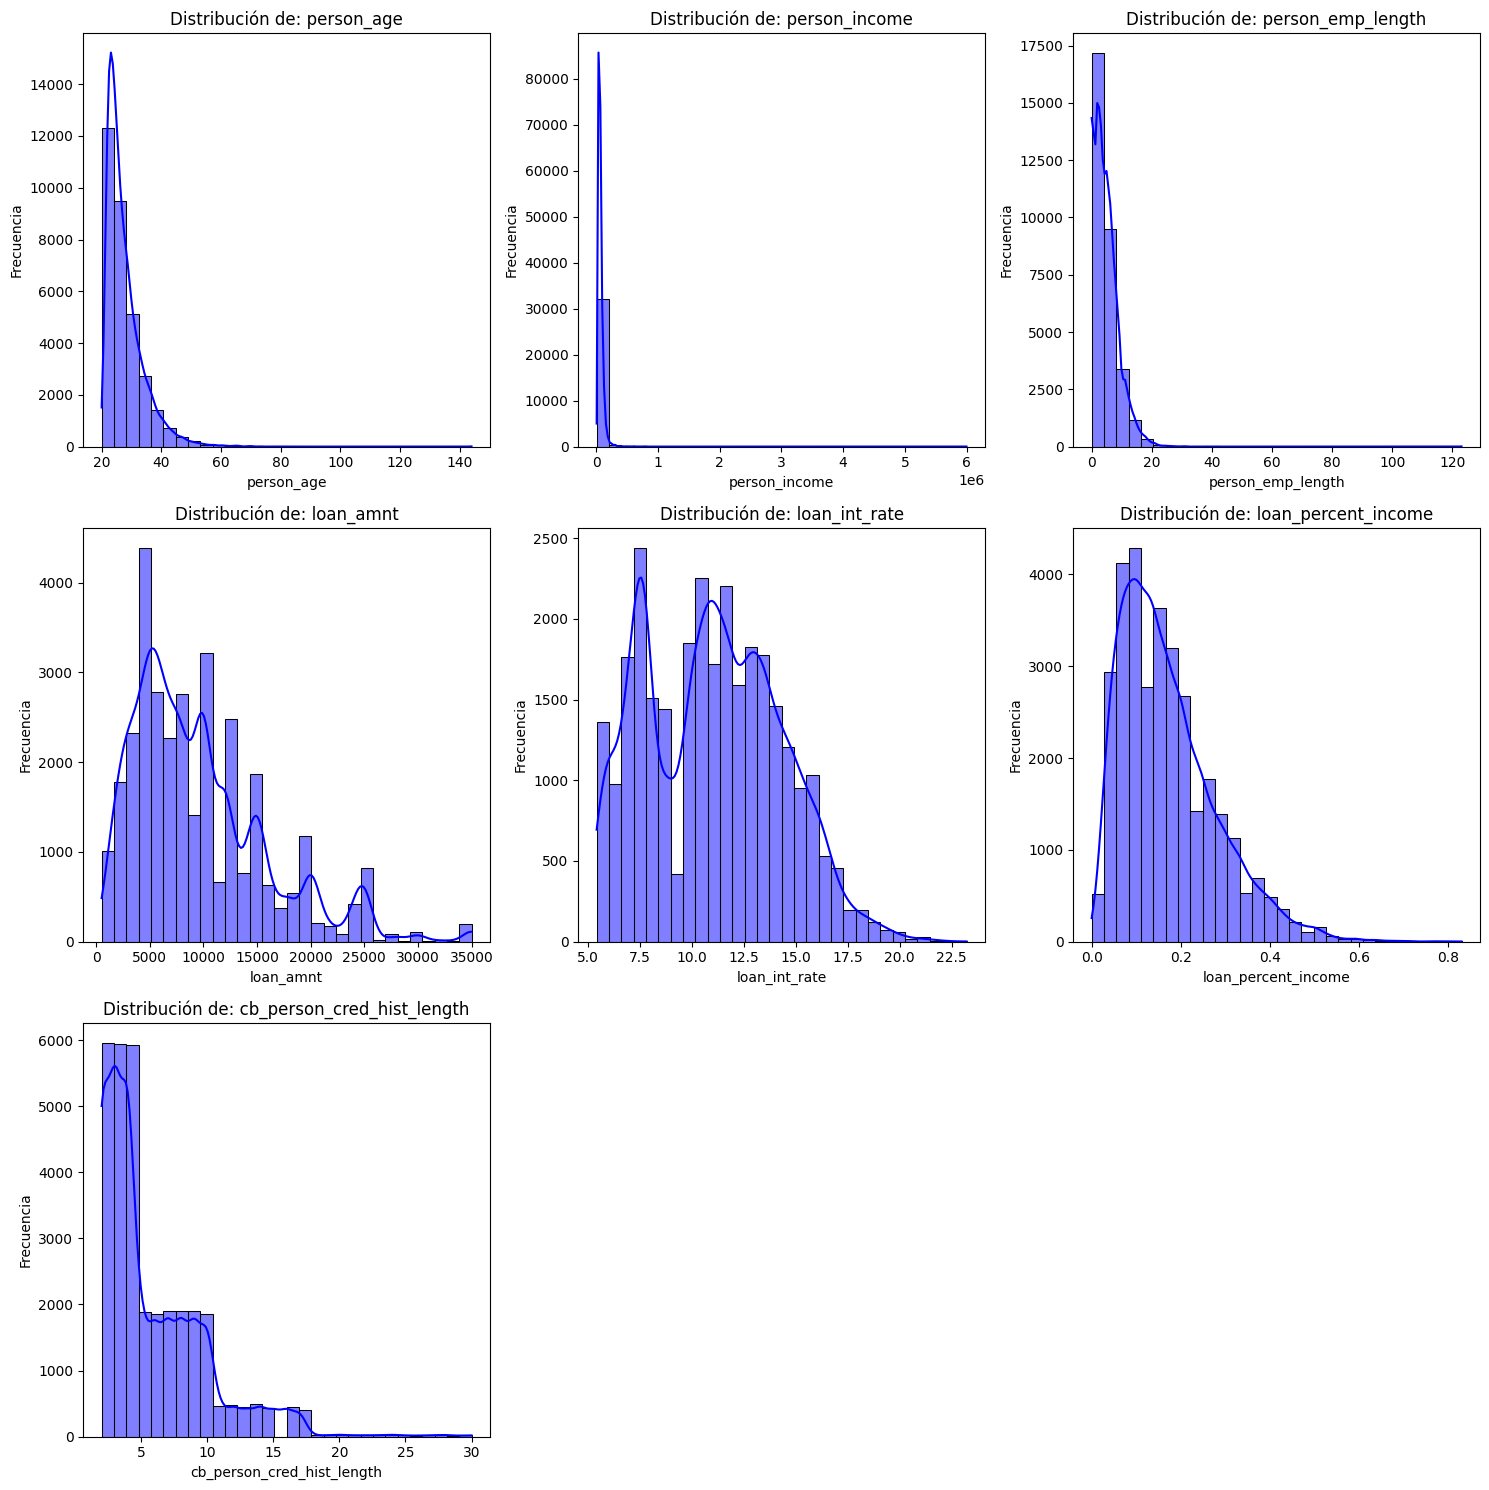

In [156]:
columnas = Forma.columns
num_cols = len(columnas)

fig, axes = plt.subplots(3, 3, figsize=(15, 15))
axes = axes.ravel()

for i, col in enumerate(columnas):
    ax = axes[i]
    
    sns.histplot(Forma[col], bins=30, color='blue', edgecolor='black', kde=True, ax=ax)
    
    
    ax.set_title(f'Distribución de: {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Frecuencia')



for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Comparando los resultados obtenidos con los cálculos de asimetría y curtosis del inciso anterior, se puede observar en los gráficos de `person_age` y `loan_in_rate` un comportamiento algo diferente debido a la forma en que se distribuyen los datos, aunque concuerdan con la clasificación anterior

`person_age`:  El histograma muestra una concentración de datos en edades jóvenes a la izquierda y una cola hacia edades mayores a la derecha, lo que concuerda con la asimetría positiva. La alta curtosis refleja la agrupación de datos en el lado izquierdo y posibles valores extremos hacia la derecha.

`loan_in_rate`: El histograma muestra una distribución que podría ser ligeramente asimétrica, pero con una dispersión amplia (platicúrtica), lo que coincide con la curtosis negativa. La ligera asimetría positiva podría reflejarse en una cola suave hacia tasas de interés más altas.

5. Emplea boxplots para mostrar la distribución de los datos a través de sus cuartiles.

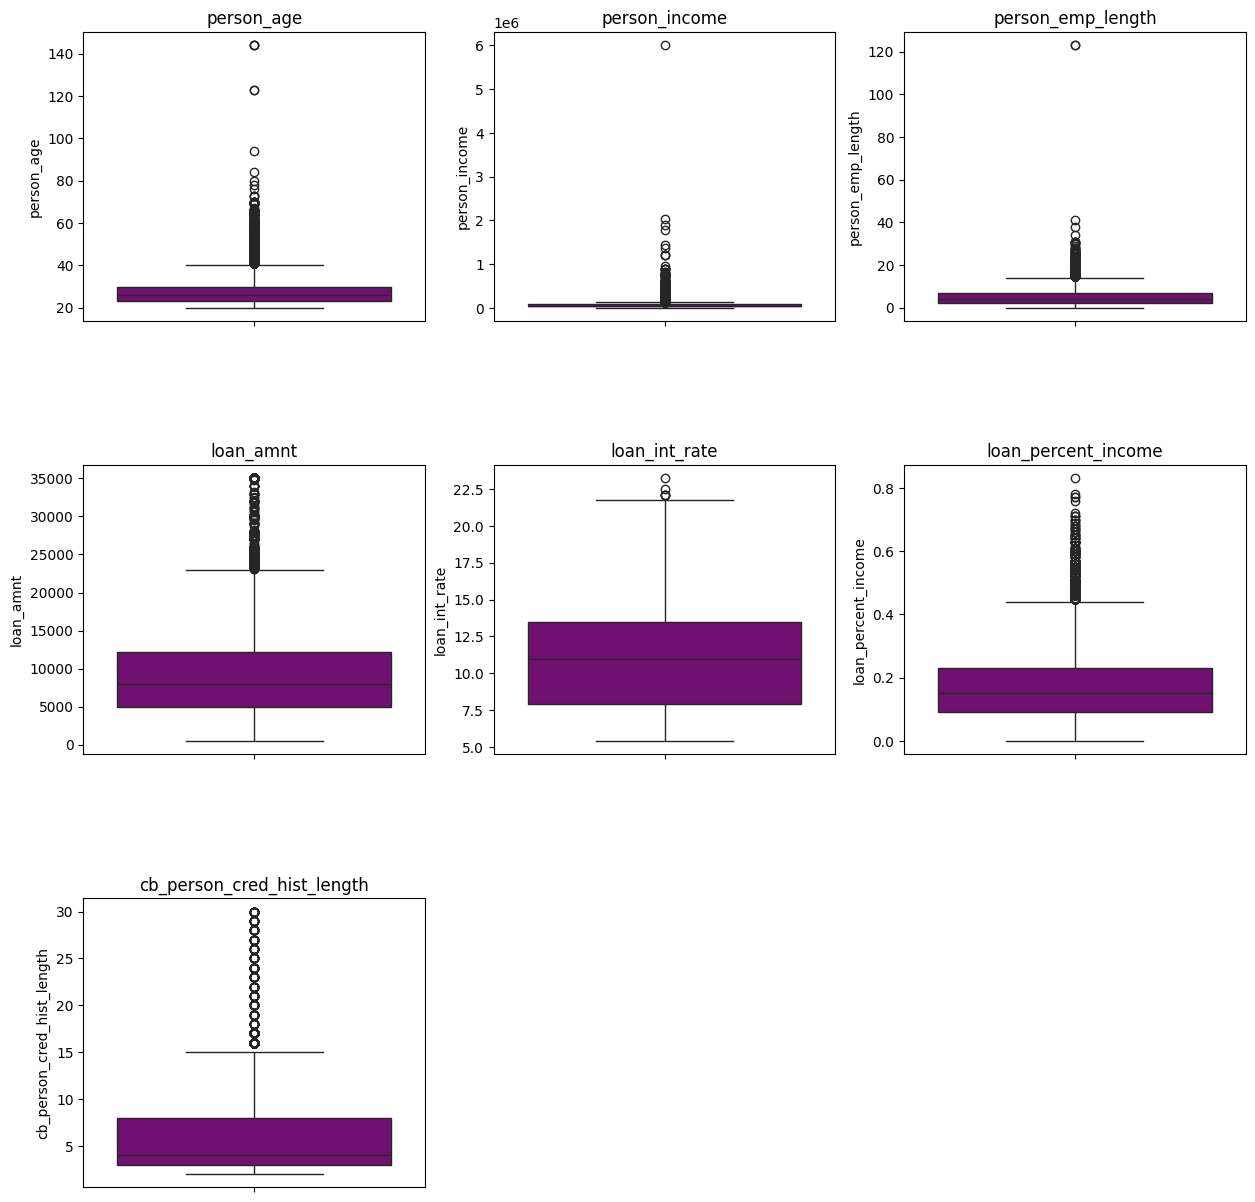

In [157]:
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
plt.subplots_adjust(hspace=0.5)

axes = axes.ravel()

for col, ax in zip(Forma.columns, axes):
    sns.boxplot(df[col], ax=ax, fill=True, color='purple')
    ax.set(title=f'{col}', xlabel=None)
    ax.tick_params(axis='x', rotation=90)
for j in range(i+1,len(axes)):
    fig.delaxes(axes[j])

*   Como podrás observar hay valores atípicos en todas las variables. Ejecuta el siguiente código para identificar los valores atípicos en la variable `person_age`

In [158]:
percentile_25 = df["person_age"].quantile(0.25)
percentile_75 = df["person_age"].quantile(0.75)
iqr = percentile_75 - percentile_25
upper_limit = percentile_75 + 1.5 * iqr
lower_limit = percentile_25 - 1.5 * iqr
IQR_outliers = df[(df["person_age"] < lower_limit) | (df["person_age"] > upper_limit)]
IQR_outliers

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
81,144,250000,RENT,4.0,VENTURE,C,4800,13.57,0,0.02,N,3
183,144,200000,MORTGAGE,4.0,EDUCATION,B,6000,11.86,0,0.03,N,2
575,123,80004,RENT,2.0,EDUCATION,B,20400,10.25,0,0.25,N,3
747,123,78000,RENT,7.0,VENTURE,B,20000,NaN,0,0.26,N,4
29121,50,900000,MORTGAGE,11.0,DEBTCONSOLIDATION,B,30000,12.69,0,0.03,N,15
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


# Análisis de variables de texto

 6. Obtén las siguientes estadísticas descriptivas para todas las variables de texto:
*   Tendencia central (moda)
*   Cardinalidad (cantidad de valores únicos)
*   Recuentos únicos (número de ocurrencias para cada valor único)

**NOTA**. Un resumen de estas estadísticas, puedes obtenerlas indicando en la función `describe()` que se incluirán sólo las variables de tipo object: `describe(include = 'object')`. Para los recuentos utiliza la función `df['columna'].value_counts()`

In [159]:
df_text=df.describe(include='object').T
df_text

,count,unique,top,freq
person_home_ownership,32581,4,RENT,16446
loan_intent,32581,6,EDUCATION,6453
loan_grade,32581,7,A,10777
loan_status,32581,2,0,25473
cb_person_default_on_file,32581,2,N,26836


In [165]:
for i in df_text:
    print(df[i].value_counts(),'\n')


person_home_ownership
RENT        16446
MORTGAGE    13444
OWN          2584
OTHER         107
Name: count, dtype: int64 

loan_intent
EDUCATION            6453
MEDICAL              6071
VENTURE              5719
PERSONAL             5521
DEBTCONSOLIDATION    5212
HOMEIMPROVEMENT      3605
Name: count, dtype: int64 

loan_grade
A    10777
B    10451
C     6458
D     3626
E      964
F      241
G       64
Name: count, dtype: int64 

loan_status
0    25473
1     7108
Name: count, dtype: int64 

cb_person_default_on_file
N    26836
Y     5745
Name: count, dtype: int64 



7. Utiliza gráficos de barras por variable para representar la frecuencia de cada categoría.

**NOTA**. seaborn posee un gráfico de recuento, para variables de tipo object, que calcula la frecuencia de cada categoría sin necesidad de utilizar la función `value_counts()`. Para generarlo debes indicar la columna: `sns.countplot(x='columna', data=df) `

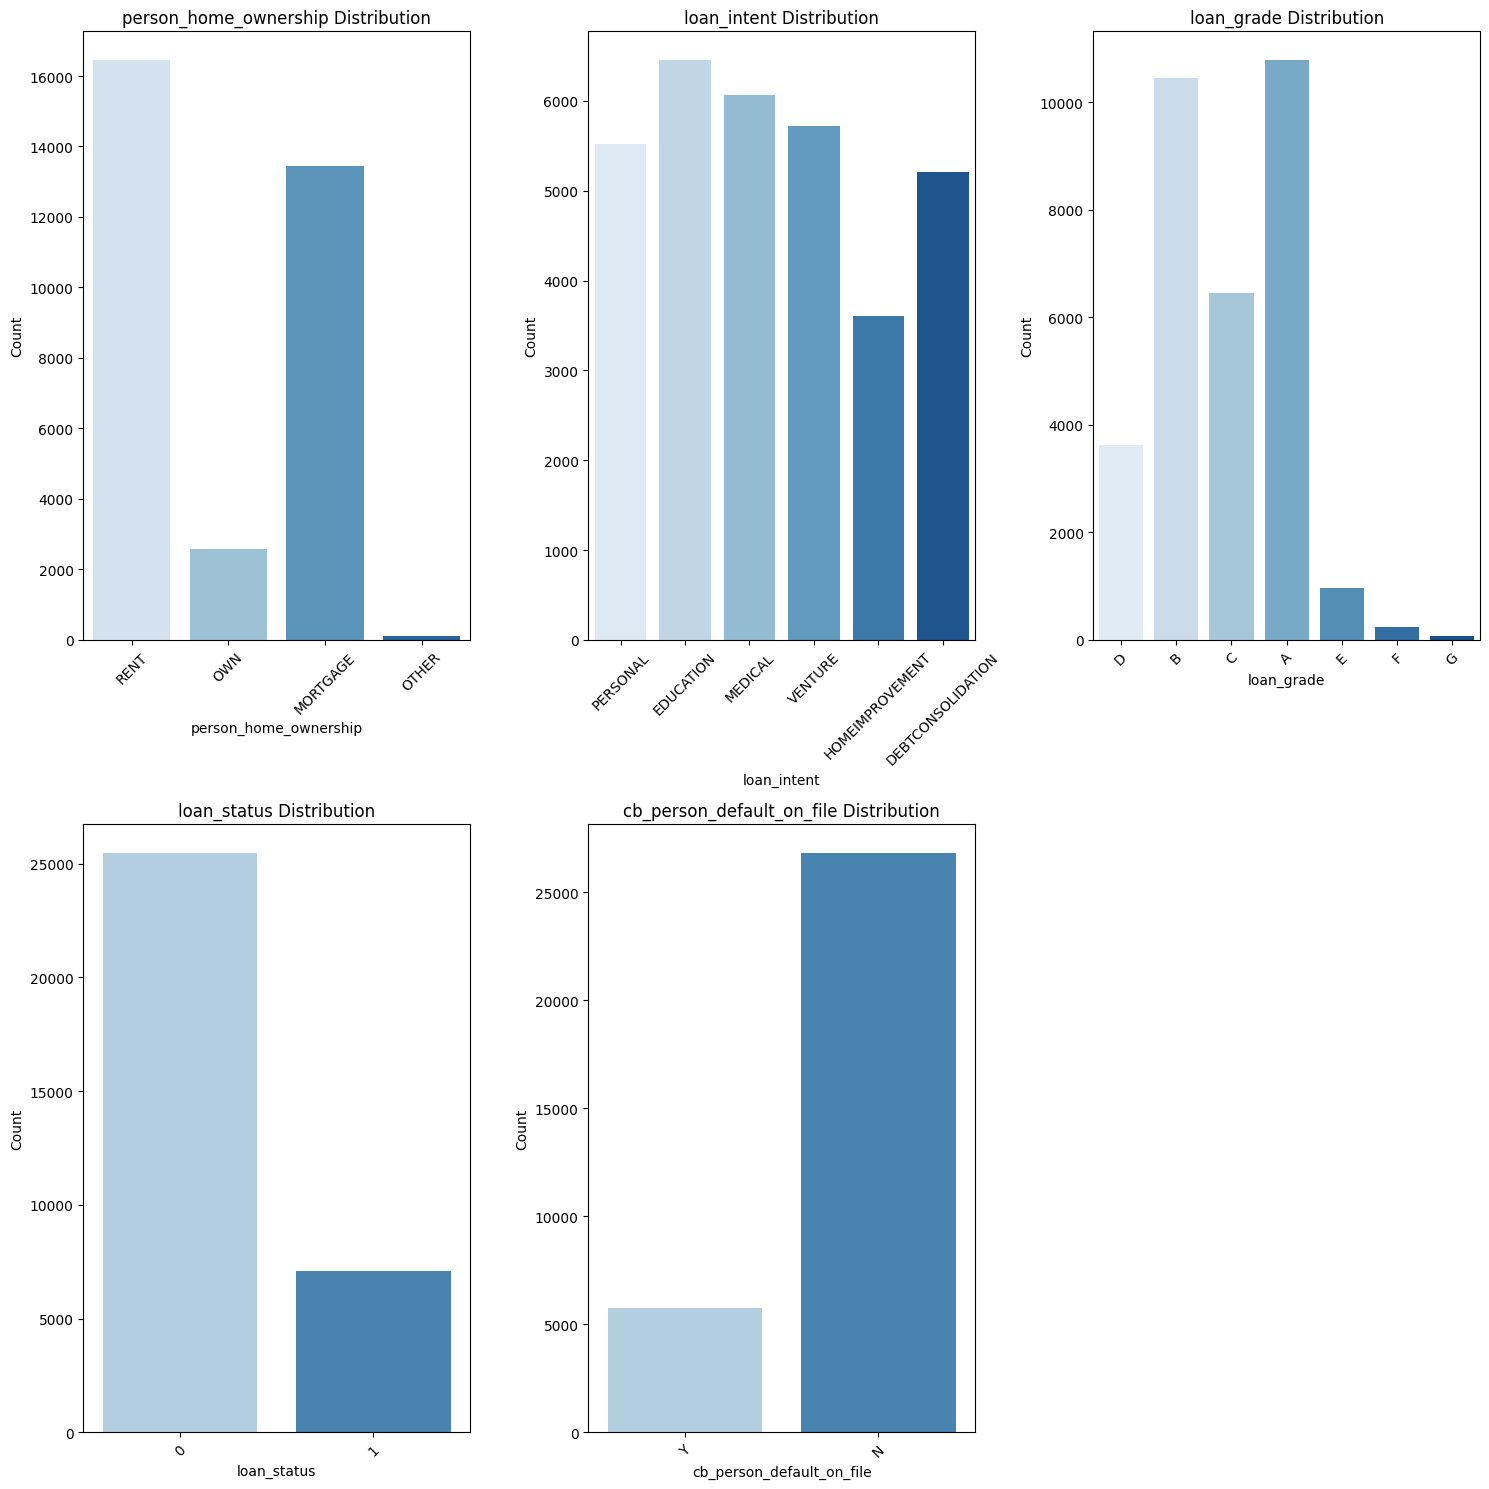

In [161]:
df_text = df.select_dtypes('object')

fig, axes = plt.subplots(2, 3, figsize=(15, 15))
axes = axes.ravel()

for i, col in enumerate(df_text): 
    ax=axes[i] 
    sns.countplot(x=df_text[col], ax=ax, hue=df_text[col], palette='Blues', legend=False)  
    axes[i].set_title(f'{col} Distribution')
    axes[i].set_xlabel(f'{col}')
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=45)  

for j in range(i+1,len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


# **Parte 2**. Análisis de correlación (bivariante y multivariante)

La variable `loan_status` será la variable de salida (o a predecir en un modelo de ML). Analiza su relación con el resto de las variables a través de los siguientes gráficos:

8. Un box plot para visualizar la distribución de `loan_percent_income` según el `loan_status`. Interpreta el resultado.

Text(0.5, 1.0, 'Distribución de Loan Percent Income según Loan Status')

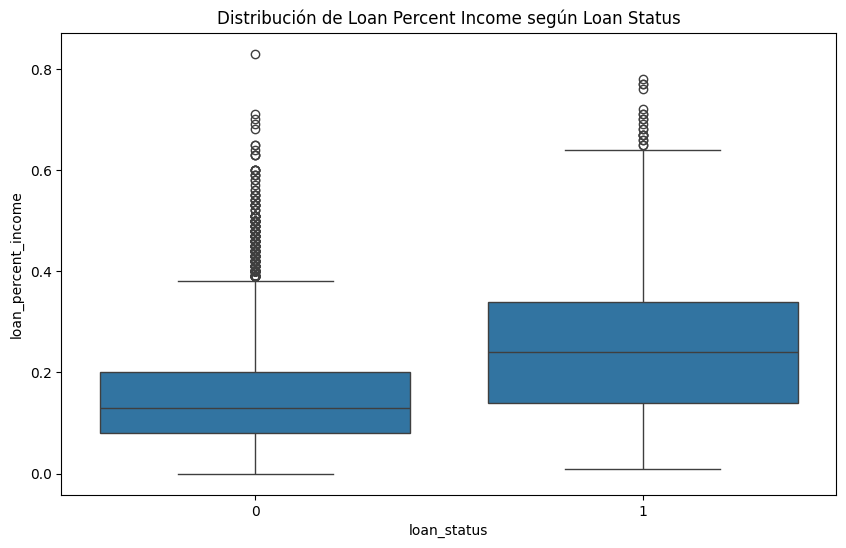

In [162]:
df_box1 = df[['loan_status', 'loan_percent_income']]
plt.figure(figsize=(10, 6))
sns.boxplot(x='loan_status', y='loan_percent_income', data=df_box1, legend=False)
plt.title('Distribución de Loan Percent Income según Loan Status')


`loan_status`: Estado del préstamo (`0 no incumplimiento`, `1 incumplimiento o en mora`)

Se observa que, para los usuarios cuyo pago está al día (0), la mayoría de los solicitantes destina un porcentaje bajo de sus ingresos al pago del préstamo. Esto concuerda con la idea de que, a mayor relación entre el préstamo e ingreso, mayor es la probabilidad de incumplimiento.

Por otro lado, los solicitantes en incumplimiento (1) tienen préstamos que representan una gran parte de sus ingresos, lo que indica dificultades para cubrir el pago.

Cabe destacar que los valores atípicos se encuentran en los casos donde el préstamo representa casi la totalidad del ingreso del solicitante. Estos valores podrían deberse a un mal manejo de la base de datos o a que el solicitante no declara ingresos adicionales


 9. En los gráficos de barras que obtuviste en el ejercicio 7, separa el conteo según el `load_status`, utilizando el parámetro `hue`.

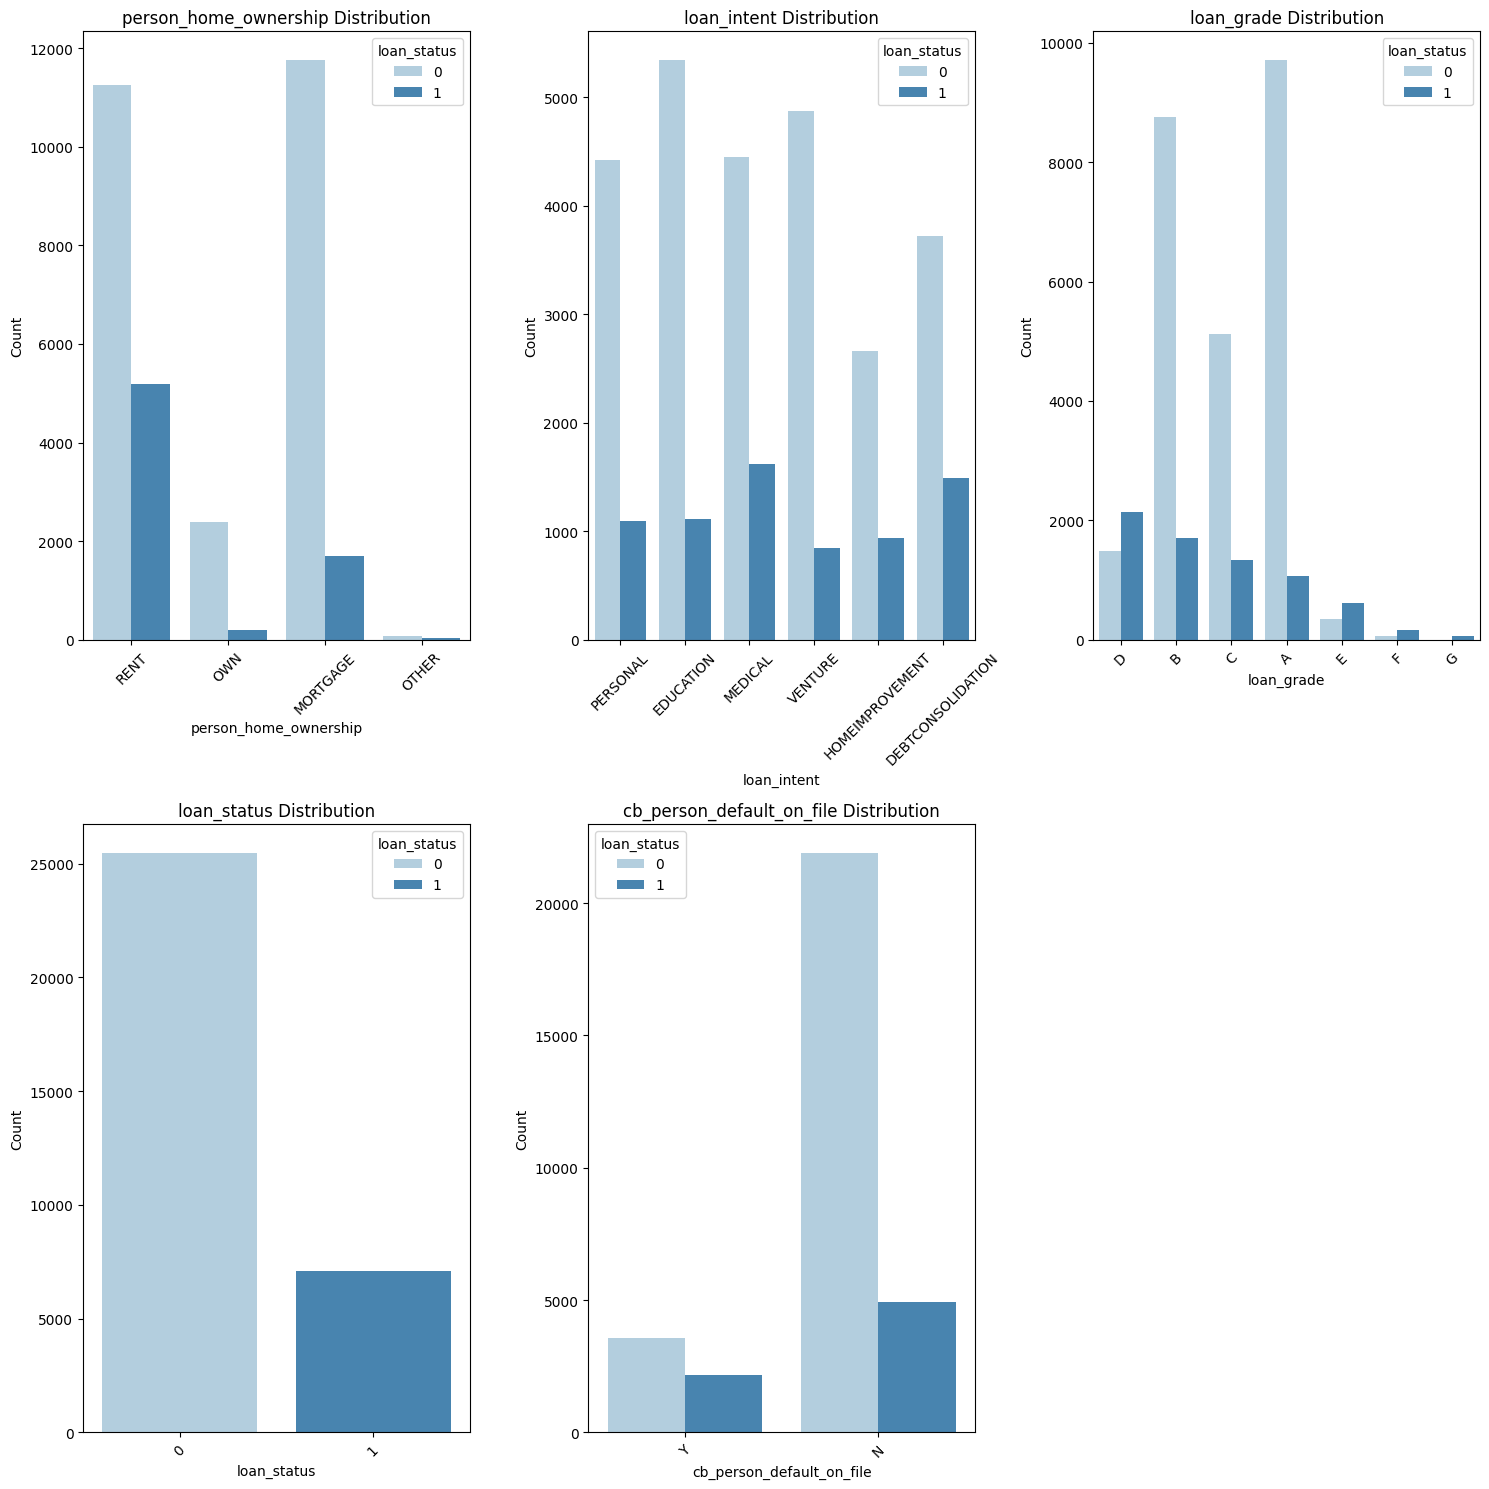

In [163]:
fig, axes = plt.subplots(2, 3, figsize=(15, 15))
axes = axes.ravel()

for i, col in enumerate(df_text.columns):
    sns.countplot(data=df_text, x=col, ax=axes[i], hue='loan_status', palette='Blues')
    axes[i].set_title(f'{col} Distribution')
    axes[i].set_xlabel(f'{col}')
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=45)

for j in range(i+1,len(axes)):
    fig.delaxes(axes[j])
    
plt.tight_layout()
plt.show()


10. Un mapa de calor con los valores de correlación de todas las variables del dataframe.
*   ¿Qué variable tiene mayor correlación con `loan_status`?

<AxesSubplot: >

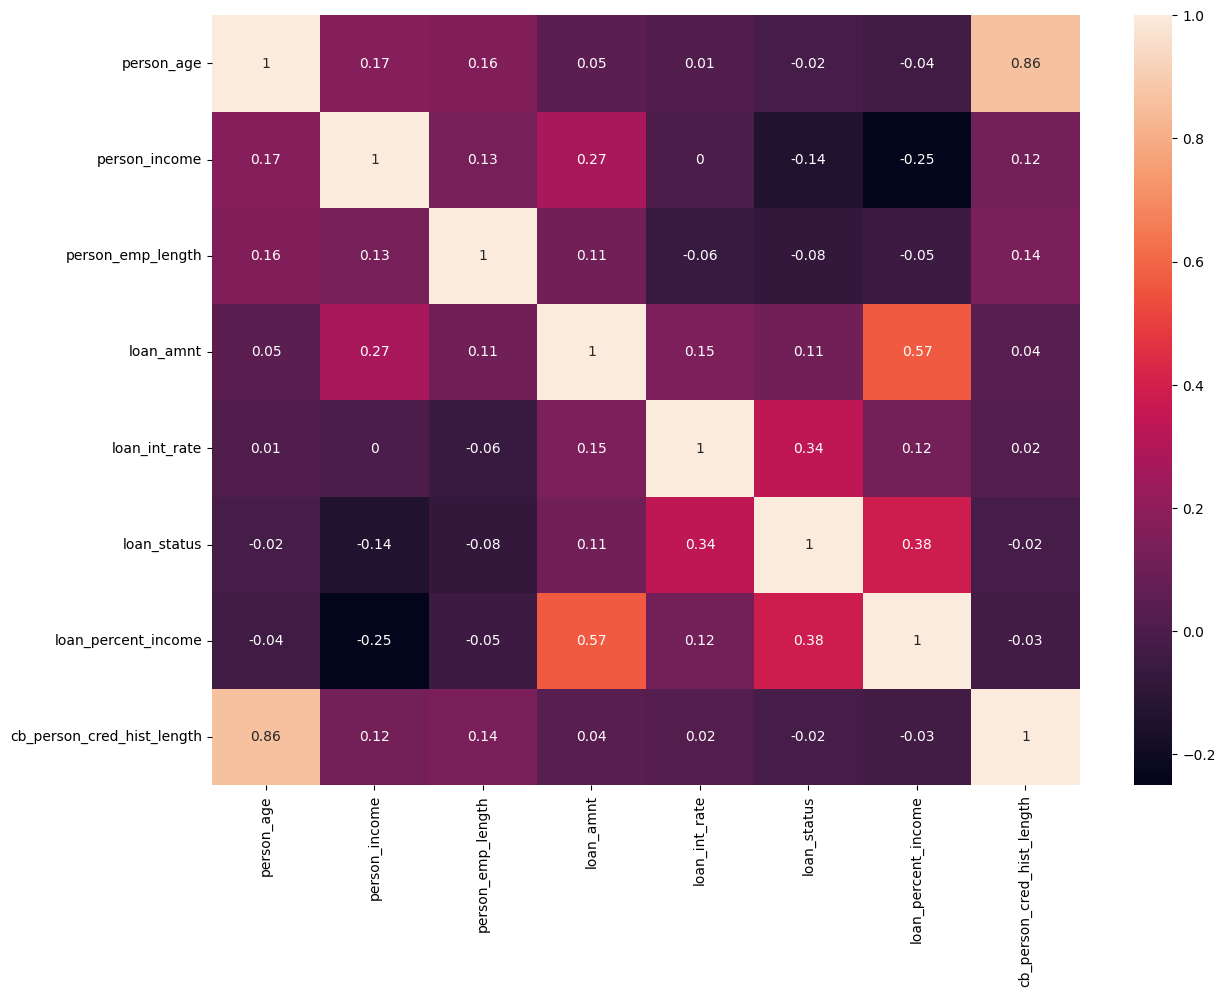

In [166]:
plt.figure(figsize = (14, 10))
df['loan_status'] = pd.to_numeric(df['loan_status'])
sns.heatmap(round(df.corr(numeric_only=True),2), annot = True)

`loan_percent_income` con un valor de `0.38`. Esto indica que hay una correlación positiva moderada entre el porcentaje de ingresos destinado al préstamo y el estado del préstamo. Esto podría sugerir que a medida que aumenta el porcentaje de ingresos destinado al préstamo, es más probable que el estado del préstamo cambie (por ejemplo, una correlacion positiva podria indicar una mayor probabilidad de cumplimiento de pago).